### (1) !pip install

In [3]:
# 설치해야 할 것들, 설치 후 런타임 다시 시작 필요
!pip install scikit-learn==0.23.2
!pip install h5py
!pip install typing-extensions
!pip install wheel
!pip install catboost
!pip install xgboost
!pip install folium
!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import random as rn
import os
import warnings
import scipy.stats as stats
import folium
import geopy.distance 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from collections import Counter

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%matplotlib inline
warnings.filterwarnings(action='ignore')

In [5]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [6]:
import jinja2
from pycaret.regression import *

### (2) 데이터 불러오기

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# train(9월): 모델 학습 및 테스트용
# test(10월): 실 데이터 예측용
train=pd.read_csv("/content/drive/MyDrive/Project/팀 프로젝트/2_jeju_bus/data/train.csv", index_col = 0)
test=pd.read_csv("/content/drive/MyDrive/Project/팀 프로젝트/2_jeju_bus/data/test.csv", index_col = 0)

# 제주 주소 데이터
bus_code= pd.read_csv("/content/drive/MyDrive/Project/팀 프로젝트/2_jeju_bus/data/data_re/bus_code_amend.csv", index_col = 0)

In [21]:
train.head()

date  bus_route_id in_out  station_code  station_name  latitude  \
id                                                                          
0   2019-09-01       4270000     시외           344         제주썬호텔  33.48990   
1   2019-09-01       4270000     시외           357          한라병원  33.48944   
2   2019-09-01       4270000     시외           432          정존마을  33.48181   
3   2019-09-01       4270000     시내          1579  제주국제공항(600번)  33.50577   
4   2019-09-01       4270000     시내          1646      중문관광단지입구  33.25579   

    longitude  6~7_ride  7~8_ride  8~9_ride  9~10_ride  10~11_ride  \
id                                                                   
0   126.49373       0.0       1.0       2.0        5.0         2.0   
1   126.48508       1.0       4.0       4.0        2.0         5.0   
2   126.47352       1.0       1.0       0.0        2.0         0.0   
3   126.49252       0.0      17.0       6.0       26.0        14.0   
4   126.41260       0.0       0.0       0.0        0.0         0.0   

    11~12_ride  6~7_takeoff  7~8_takeoff  8~9_takeoff  9~10_takeoff  \
id                                                                    
0          6.0          0.0          0.0          0.0           0.0   
1          6.0          0.0          0.0          0.0           0.0   
2          0.0          0.0          0.0          0.0           0.0   
3         16.0          0.0          0.0          0.0           0.0   
4          0.0          0.0          0.0          0.0           1.0   

    10~11_takeoff  11~12_takeoff  18~20_ride  
id                                            
0             0.0            0.0         0.0  
1             0.0            0.0         5.0  
2             0.0            0.0         2.0  
3             0.0            0.0        53.0  
4             0.0            0.0         0.0

In [22]:
test.head()

date  bus_route_id in_out  station_code  station_name  latitude  \
id                                                                              
415423  2019-10-01       4270000     시외           344         제주썬호텔  33.48990   
415424  2019-10-01       4270000     시외           357          한라병원  33.48944   
415425  2019-10-01       4270000     시외           432          정존마을  33.48181   
415426  2019-10-01       4270000     시내          1579  제주국제공항(600번)  33.50577   
415427  2019-10-01       4270000     시내          1636          롯데호텔  33.24872   

        longitude  6~7_ride  7~8_ride  8~9_ride  9~10_ride  10~11_ride  \
id                                                                       
415423  126.49373       4.0       4.0       7.0        2.0         9.0   
415424  126.48508       1.0       6.0       6.0        1.0         8.0   
415425  126.47352       2.0       4.0       2.0        2.0         2.0   
415426  126.49252       1.0      11.0      18.0        8.0        26.0   
415427  126.41032       0.0       0.0       0.0        0.0         0.0   

        11~12_ride  6~7_takeoff  7~8_takeoff  8~9_takeoff  9~10_takeoff  \
id                                                                        
415423         1.0          0.0          0.0          0.0           0.0   
415424        11.0          0.0          0.0          0.0           0.0   
415425         1.0          0.0          0.0          0.0           0.0   
415426        20.0          0.0          0.0          0.0           0.0   
415427         0.0          0.0          0.0          0.0           1.0   

        10~11_takeoff  11~12_takeoff  
id                                    
415423            0.0            1.0  
415424            0.0            0.0  
415425            0.0            0.0  
415426            0.0            0.0  
415427            0.0            0.0

In [23]:
bus_code.head()

station_code  latitude  longitude                       address    si  \
0           344  33.48990  126.49373               대한민국 제주시 제주 썬호텔   제주시   
1           357  33.48944  126.48508          대한민국 제주특별자치도 제주시 도령로   제주시   
2           432  33.48181  126.47352                 대한민국 제주시 정존마을   제주시   
3          1579  33.50577  126.49252  대한민국 제주특별자치도 제주시 용담2동 1984-5   제주시   
4          1646  33.25579  126.41260            대한민국 서귀포시 중문관광단지입구  서귀포시   

   si_class  si_jeju  si_seogwipo  
0         1        1            0  
1         1        1            0  
2         1        1            0  
3         1        1            0  
4         0        0            1

### (3) 필요한 항목 추가(전처리)

#### 1) 비 항목 추가
- 비 오면 1, 그렇지 않으면 0

In [24]:
IsRainy = ['09-04', '09-05', '09-06', '09-07', '09-10', '09-11', '09-12', '09-13', '09-14', '09-22', 
            '10-02', '10-03', '10-05', '10-07']
IsRainy = ['2019-'+ day for day in IsRainy]

train['Rain'] = train.apply(lambda row: 1 if row.date in IsRainy else 0, axis=1)
test['Rain'] = test.apply(lambda row: 1 if row.date in IsRainy else 0, axis=1)

train.shape, test.shape

((415423, 21), (228170, 20))

#### 2) 태풍 항목 추가
- 태풍이 제주도에 영향 미치날이면 1, 아니면 0

In [25]:
train['typhoon'] = train['date'].apply(lambda date : 1 if date in ('2019-09-06', '2019-09-07', '2019-09-20', '2019-09-21', '2019-09-22', '2019-10-01','2019-10-02') else 0)
test['typhoon'] = test['date'].apply(lambda date : 1 if date in ('2019-09-06', '2019-09-07', '2019-09-20', '2019-09-21', '2019-09-22', '2019-10-01','2019-10-02') else 0)

train.shape, test.shape

((415423, 22), (228170, 21))

#### 3) 시내/시외 항목 변경
- 시내:0, 시외:1 로 각각 변환

In [26]:
train['in_out'] = train['in_out'].map({'시내':0,'시외':1})
test['in_out'] = test['in_out'].map({'시내':0,'시외':1})

#### 4) 평일, 주말, 공휴일 항목 추가

In [27]:
# 공휴일 확인
holidays = ['09-12', '09-13', '09-14', '10-03', '10-09']
holidays = ['2019-'+day for day in holidays]

train['holiday'] = train.apply(lambda row: 1 if row.date in holidays else 0, axis=1)
test['holiday'] = test.apply(lambda row: 1 if row.date in holidays else 0, axis=1)
train.shape, test.shape

((415423, 23), (228170, 22))

In [28]:
#date 변수 변환
train['date2'] = pd.to_datetime(train['date'])
test['date2']=pd.to_datetime(test['date'])
train['week'] = train['date2'].dt.weekday #요일별로 변수 변경(train)

test['date2'] = pd.to_datetime(test['date'])
test['week'] = test['date2'].dt.weekday #요일별로 변수 변경(test)

del train['date2'] #임의 컬럼 삭제
del test['date2']

In [29]:
# week(평일), weekend(주말), holiday(공휴일)
holidays = ['09-12', '09-13', '09-14', '10-03', '10-09']
holidays = ['2019-'+day for day in holidays]

train['holiday'] = train.apply(lambda row: 1 if row.date in holidays else 0, axis=1)
train['weekend'] = train.apply(lambda row: 1 if row.week in [5,6] else 0, axis=1)
train['Mon'] = train.apply(lambda row: 1 if row.week == 0 else 0, axis=1)
train['Tue'] = train.apply(lambda row: 1 if row.week == 1 else 0, axis=1)
train['Wed'] = train.apply(lambda row: 1 if row.week == 2 else 0, axis=1)
train['Thu'] = train.apply(lambda row: 1 if row.week == 3 else 0, axis=1)
train['Fri'] = train.apply(lambda row: 1 if row.week == 4 else 0, axis=1)

test['holiday'] = test.apply(lambda row: 1 if row.date in holidays else 0, axis=1)
test['weekend'] = test.apply(lambda row: 1 if row.week in [5,6] else 0, axis=1)
test['Mon'] = test.apply(lambda row: 1 if row.week == 0 else 0, axis=1)
test['Tue'] = test.apply(lambda row: 1 if row.week == 1 else 0, axis=1)
test['Wed'] = test.apply(lambda row: 1 if row.week == 2 else 0, axis=1)
test['Thu'] = test.apply(lambda row: 1 if row.week == 3 else 0, axis=1)
test['Fri'] = test.apply(lambda row: 1 if row.week == 4 else 0, axis=1)

#### 4) 제주시 서귀포시 항목 추가
- si_jeju : 제주시면 1, 그렇지 않으면 0
- si_seogwipo : 서귀포시면 1, 그렇지 않으면 0

In [30]:
# si_jeju : 제주시면 1, 그렇지 않으면 0
# si_seogwipo : 서귀포시면 1, 그렇지 않으면 0
bus_code=bus_code[['station_code', 'si_jeju', 'si_seogwipo']]
train=pd.merge(train, bus_code, how='left', on='station_code')
test=pd.merge(test, bus_code, how='left', on='station_code')

#### 5) 측정소별 거리 측정

In [31]:
jeju=(33.51411, 126.52969) # 제주 측정소 근처
gosan=(33.29382, 126.16283) #고산 측정소 근처
seongsan=(33.38677, 126.8802) #성산 측정소 근처
po=(33.24616, 126.5653) #서귀포 측정소 근처

In [32]:
import geopy.distance 

In [33]:
t1 = [geopy.distance.vincenty( (i,j), jeju).km for i,j in list( zip( train['latitude'],train['longitude'] )) ]
t2 = [geopy.distance.vincenty( (i,j), gosan).km for i,j in list( zip( train['latitude'],train['longitude'] )) ]
t3 = [geopy.distance.vincenty( (i,j), seongsan).km for i,j in list( zip( train['latitude'],train['longitude'] )) ]
t4 = [geopy.distance.vincenty( (i,j), po).km for i,j in list( zip( train['latitude'],train['longitude'] )) ]

train['dis_jeju']=t1
train['dis_gosan']=t2
train['dis_seongsan']=t3
train['dis_po']=t4

total=pd.DataFrame( list(zip( t1,t2,t3,t4)),columns=['jeju','gosan','seongsan','po'] )
train['dist_name'] = total.apply(lambda x: x.argmin(), axis=1)

data22=train[['station_name','latitude','longitude','dist_name']].drop_duplicates(keep='first')

Counter(data22['dist_name'])

Counter({0: 1479, 3: 828, 1: 659, 2: 597})

In [34]:
t1 = [geopy.distance.vincenty( (i,j), jeju).km for i,j in list( zip( test['latitude'],test['longitude'] )) ]
t2 = [geopy.distance.vincenty( (i,j), gosan).km for i,j in list( zip( test['latitude'],test['longitude'] )) ]
t3 = [geopy.distance.vincenty( (i,j), seongsan).km for i,j in list( zip( test['latitude'],test['longitude'] )) ]
t4 = [geopy.distance.vincenty( (i,j), po).km for i,j in list( zip( test['latitude'],test['longitude'] )) ]

test['dis_jeju']=t1
test['dis_gosan']=t2
test['dis_seongsan']=t3
test['dis_po']=t4

total=pd.DataFrame( list(zip( t1,t2,t3,t4)),columns=['jeju','gosan','seongsan','po'] )
test['dist_name'] = total.apply(lambda x: x.argmin(), axis=1)

#### 6) 시간 2시간 씩 합치기

In [35]:
train['68a']=train['6~7_ride']+train['7~8_ride']
train['810a']=train['8~9_ride']+train['9~10_ride']
train['1012a']=train['10~11_ride']+train['11~12_ride']
test['68a']=test['6~7_ride']+test['7~8_ride']
test['810a']=test['8~9_ride']+test['9~10_ride']
test['1012a']=test['10~11_ride']+test['11~12_ride']

#### 7) 최종 데이터 저장

In [36]:
train.head()

date  bus_route_id  in_out  station_code  station_name  latitude  \
0  2019-09-01       4270000       1           344         제주썬호텔  33.48990   
1  2019-09-01       4270000       1           357          한라병원  33.48944   
2  2019-09-01       4270000       1           432          정존마을  33.48181   
3  2019-09-01       4270000       0          1579  제주국제공항(600번)  33.50577   
4  2019-09-01       4270000       0          1646      중문관광단지입구  33.25579   

   longitude  6~7_ride  7~8_ride  8~9_ride  9~10_ride  10~11_ride  11~12_ride  \
0  126.49373       0.0       1.0       2.0        5.0         2.0         6.0   
1  126.48508       1.0       4.0       4.0        2.0         5.0         6.0   
2  126.47352       1.0       1.0       0.0        2.0         0.0         0.0   
3  126.49252       0.0      17.0       6.0       26.0        14.0        16.0   
4  126.41260       0.0       0.0       0.0        0.0         0.0         0.0   

   6~7_takeoff  7~8_takeoff  8~9_takeoff  9~10_takeoff  10~11_takeoff  \
0          0.0          0.0          0.0           0.0            0.0   
1          0.0          0.0          0.0           0.0            0.0   
2          0.0          0.0          0.0           0.0            0.0   
3          0.0          0.0          0.0           0.0            0.0   
4          0.0          0.0          0.0           1.0            0.0   

   11~12_takeoff  18~20_ride  Rain  typhoon  holiday  week  weekend  Mon  Tue  \
0            0.0         0.0     0        0        0     6        1    0    0   
1            0.0         5.0     0        0        0     6        1    0    0   
2            0.0         2.0     0        0        0     6        1    0    0   
3            0.0        53.0     0        0        0     6        1    0    0   
4            0.0         0.0     0        0        0     6        1    0    0   

   Wed  Thu  Fri  si_jeju  si_seogwipo   dis_jeju  dis_gosan  dis_seongsan  \
0    0    0    0        1            0   4.286659  37.692766     37.713630   
1    0    0    0        1            0   4.966848  37.008492     38.465822   
2    0    0    0        1            0   6.330746  35.642126     39.259820   
3    0    0    0        1            0   3.575272  38.643401     38.386802   
4    0    0    0        0            1  30.652098  23.648361     45.899140   

      dis_po  dist_name   68a  810a  1012a  
0  27.841879          0   1.0   7.0    8.0  
1  27.996179          0   5.0   6.0   11.0  
2  27.496551          0   2.0   2.0    0.0  
3  29.579404          0  17.0  32.0   30.0  
4  14.269792          3   0.0   0.0    0.0

In [37]:
test.head()

date  bus_route_id  in_out  station_code  station_name  latitude  \
0  2019-10-01       4270000       1           344         제주썬호텔  33.48990   
1  2019-10-01       4270000       1           357          한라병원  33.48944   
2  2019-10-01       4270000       1           432          정존마을  33.48181   
3  2019-10-01       4270000       0          1579  제주국제공항(600번)  33.50577   
4  2019-10-01       4270000       0          1636          롯데호텔  33.24872   

   longitude  6~7_ride  7~8_ride  8~9_ride  9~10_ride  10~11_ride  11~12_ride  \
0  126.49373       4.0       4.0       7.0        2.0         9.0         1.0   
1  126.48508       1.0       6.0       6.0        1.0         8.0        11.0   
2  126.47352       2.0       4.0       2.0        2.0         2.0         1.0   
3  126.49252       1.0      11.0      18.0        8.0        26.0        20.0   
4  126.41032       0.0       0.0       0.0        0.0         0.0         0.0   

   6~7_takeoff  7~8_takeoff  8~9_takeoff  9~10_takeoff  10~11_takeoff  \
0          0.0          0.0          0.0           0.0            0.0   
1          0.0          0.0          0.0           0.0            0.0   
2          0.0          0.0          0.0           0.0            0.0   
3          0.0          0.0          0.0           0.0            0.0   
4          0.0          0.0          0.0           1.0            0.0   

   11~12_takeoff  Rain  typhoon  holiday  week  weekend  Mon  Tue  Wed  Thu  \
0            1.0     0        1        0     1        0    0    1    0    0   
1            0.0     0        1        0     1        0    0    1    0    0   
2            0.0     0        1        0     1        0    0    1    0    0   
3            0.0     0        1        0     1        0    0    1    0    0   
4            0.0     0        1        0     1        0    0    1    0    0   

   Fri  si_jeju  si_seogwipo   dis_jeju  dis_gosan  dis_seongsan     dis_po  \
0    0        1            0   4.286659  37.692766     37.713630  27.841879   
1    0        1            0   4.966848  37.008492     38.465822  27.996179   
2    0        1            0   6.330746  35.642126     39.259820  27.496551   
3    0        1            0   3.575272  38.643401     38.386802  29.579404   
4    0        0            1  31.460686  23.594010     46.355301  14.445605   

   dist_name   68a  810a  1012a  
0          0   8.0   9.0   10.0  
1          0   7.0   7.0   19.0  
2          0   6.0   4.0    3.0  
3          0  12.0  26.0   46.0  
4          3   0.0   0.0    0.0

In [38]:
train.to_csv("/content/drive/MyDrive/Project/팀 프로젝트/2_jeju_bus/data/train_final.csv",sep=",", encoding='utf-8')
test.to_csv("/content/drive/MyDrive/Project/팀 프로젝트/2_jeju_bus/data/test_final.csv", sep=",", encoding='utf-8')

### (4) Modeling

#### 1) 필요한 data만 sorting

In [46]:
train=pd.read_csv("/content/drive/MyDrive/Project/팀 프로젝트/2_jeju_bus/data/train_final.csv", index_col = 0)
test=pd.read_csv("/content/drive/MyDrive/Project/팀 프로젝트/2_jeju_bus/data/test_final.csv", index_col = 0)

In [49]:
# 테이블에서 필요없는 컬럼들 제거
train_x = train.drop(['date', 'station_name', 'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff','7~8_takeoff', '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', 'week'], axis = 1)
test_x = test.drop(['date', 'station_name', 'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff','7~8_takeoff', '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', 'week'], axis = 1)
train_x.head()

bus_route_id  in_out  station_code  18~20_ride  Rain  typhoon  holiday  \
0       4270000       1           344         0.0     0        0        0   
1       4270000       1           357         5.0     0        0        0   
2       4270000       1           432         2.0     0        0        0   
3       4270000       0          1579        53.0     0        0        0   
4       4270000       0          1646         0.0     0        0        0   

   weekend  Mon  Tue  Wed  Thu  Fri  si_jeju  si_seogwipo   dis_jeju  \
0        1    0    0    0    0    0        1            0   4.286659   
1        1    0    0    0    0    0        1            0   4.966848   
2        1    0    0    0    0    0        1            0   6.330746   
3        1    0    0    0    0    0        1            0   3.575272   
4        1    0    0    0    0    0        0            1  30.652098   

   dis_gosan  dis_seongsan     dis_po  dist_name   68a  810a  1012a  
0  37.692766     37.713630  27.841879          0   1.0   7.0    8.0  
1  37.008492     38.465822  27.996179          0   5.0   6.0   11.0  
2  35.642126     39.259820  27.496551          0   2.0   2.0    0.0  
3  38.643401     38.386802  29.579404          0  17.0  32.0   30.0  
4  23.648361     45.899140  14.269792          3   0.0   0.0    0.0

In [50]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415423 entries, 0 to 415422
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   bus_route_id  415423 non-null  int64  
 1   in_out        415423 non-null  int64  
 2   station_code  415423 non-null  int64  
 3   18~20_ride    415423 non-null  float64
 4   Rain          415423 non-null  int64  
 5   typhoon       415423 non-null  int64  
 6   holiday       415423 non-null  int64  
 7   weekend       415423 non-null  int64  
 8   Mon           415423 non-null  int64  
 9   Tue           415423 non-null  int64  
 10  Wed           415423 non-null  int64  
 11  Thu           415423 non-null  int64  
 12  Fri           415423 non-null  int64  
 13  si_jeju       415423 non-null  int64  
 14  si_seogwipo   415423 non-null  int64  
 15  dis_jeju      415423 non-null  float64
 16  dis_gosan     415423 non-null  float64
 17  dis_seongsan  415423 non-null  float64
 18  dis_

In [51]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228170 entries, 0 to 228169
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   bus_route_id  228170 non-null  int64  
 1   in_out        228170 non-null  int64  
 2   station_code  228170 non-null  int64  
 3   Rain          228170 non-null  int64  
 4   typhoon       228170 non-null  int64  
 5   holiday       228170 non-null  int64  
 6   weekend       228170 non-null  int64  
 7   Mon           228170 non-null  int64  
 8   Tue           228170 non-null  int64  
 9   Wed           228170 non-null  int64  
 10  Thu           228170 non-null  int64  
 11  Fri           228170 non-null  int64  
 12  si_jeju       228170 non-null  int64  
 13  si_seogwipo   228170 non-null  int64  
 14  dis_jeju      228170 non-null  float64
 15  dis_gosan     228170 non-null  float64
 16  dis_seongsan  228170 non-null  float64
 17  dis_po        228170 non-null  float64
 18  dist

#### 2) pycaret 사용

In [52]:
# reproducibility 씨드의 배열은 랜덤하지 않게 유지하기 위한 장치
def seed_all(seed_num):
    rn.seed(seed_num)
    os.environ['PYTHONHASHSEED'] = str(seed_num)
    np.random.seed(seed_num)

seed_all(42)

In [53]:
seed_num = 42
py_reg = setup(train_x, target = '18~20_ride', fold_shuffle = True, session_id = seed_num, normalize = True, silent = True, remove_outliers = True)

Description             Value
0                               session_id                42
1                                   Target        18~20_ride
2                            Original Data      (415423, 23)
3                           Missing Values             False
4                         Numeric Features                 9
5                     Categorical Features                13
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set      (276256, 24)
10                    Transformed Test Set      (124627, 24)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              1089
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize              True
28                        Normalize Method            zscore
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers              True
39                      Outliers Threshold              0.05
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='18~20_ride', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                 Outlier(contamination=0.05, methods=['pca'], random_state=42,
                         target='18~20_ride')),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(tar

In [54]:
best_models = compare_models(n_select=3, sort='RMSE')

Model     MAE      MSE    RMSE      R2  \
catboost               CatBoost Regressor  0.8868   4.3857  2.0932  0.5582   
rf                Random Forest Regressor  0.8572   4.7013  2.1667  0.5264   
lightgbm  Light Gradient Boosting Machine  0.9296   4.7922  2.1881  0.5171   
et                  Extra Trees Regressor  0.9533   5.6022  2.3657  0.4354   
gbr           Gradient Boosting Regressor  1.0112   6.0915  2.4663  0.3869   
lr                      Linear Regression  1.1262   7.2817  2.6964  0.2673   
lar                Least Angle Regression  1.1262   7.2817  2.6964  0.2673   
br                         Bayesian Ridge  1.1259   7.2818  2.6964  0.2673   
ridge                    Ridge Regression  1.1244   7.2846  2.6970  0.2670   
omp           Orthogonal Matching Pursuit  1.0998   7.4481  2.7271  0.2505   
knn                 K Neighbors Regressor  1.0566   7.6774  2.7693  0.2268   
huber                     Huber Regressor  0.9436   8.3565  2.8888  0.1590   
en                            Elastic Net  1.3536   9.0524  3.0070  0.0886   
dt                Decision Tree Regressor  1.0483   9.1872  3.0299  0.0727   
lasso                    Lasso Regression  1.4465   9.9298  3.1497 -0.0000   
llar         Lasso Least Angle Regression  1.4465   9.9298  3.1497 -0.0000   
dummy                     Dummy Regressor  1.4465   9.9298  3.1497 -0.0000   
par          Passive Aggressive Regressor  2.2134  12.7548  3.5115 -0.2907   
ada                    AdaBoost Regressor  3.6212  30.0003  5.0282 -1.9897   

           RMSLE    MAPE  TT (Sec)  
catboost  0.4923  0.6470    30.025  
rf        0.4945  0.6992    47.013  
lightgbm  0.5104  0.6619     0.676  
et        0.5444  0.7758    32.158  
gbr       0.5471  0.6953    15.462  
lr        0.5930  0.7544     0.401  
lar       0.5930  0.7544     0.044  
br        0.5928  0.7543     0.174  
ridge     0.5919  0.7538     0.046  
omp       0.5932  0.7538     0.048  
knn       0.5867  0.8481    44.945  
huber     0.5384  0.7232     1.281  
en        0.6811  0.4550     0.052  
dt        0.6122  1.0132     0.873  
lasso     0.7411  0.4228     0.048  
llar      0.7411  0.4228     0.047  
dummy     0.7411  0.4228     0.164  
par       0.9379  1.3054     0.198  
ada       1.2390  2.1919     4.148

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 2
INFO:logs:[<catboost.core.CatBoostRegressor object at 0x7fa8ee3b3650>, RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False), LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=

In [55]:
best_models

 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False),
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)]

#### 3) 상위 3 모델 확인

In [56]:
# 상위 3개 모델 생성
catboost = create_model('catboost', verbose = False)
rf = create_model('rf', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=catboost, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:CatBoost Regressor Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with KFold(n_splits=10, random_state=42, shuffle=True), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:dis

In [58]:
blend_models = blend_models(estimator_list = [catboost, rf, lightgbm])

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.8752  4.1182  2.0293  0.5573  0.4794  0.6509
1     0.8601  4.3860  2.0943  0.5468  0.4773  0.6415
2     0.8586  4.3177  2.0779  0.5687  0.4782  0.6319
3     0.8699  4.6914  2.1660  0.5569  0.4828  0.6280
4     0.8592  4.2234  2.0551  0.5586  0.4783  0.6388
5     0.8499  4.4008  2.0978  0.5779  0.4756  0.6178
6     0.8803  5.0628  2.2501  0.5365  0.4818  0.6379
7     0.8703  4.1580  2.0391  0.5806  0.4838  0.6205
8     0.8614  3.9615  1.9904  0.5466  0.4825  0.6377
9     0.8660  4.1851  2.0458  0.5876  0.4787  0.6208
Mean  0.8651  4.3505  2.0846  0.5617  0.4798  0.6326
Std   0.0085  0.3024  0.0712  0.0157  0.0026  0.0102

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 6
INFO:logs:VotingRegressor(estimators=[('catboost',
                             <catboost.core.CatBoostRegressor object at 0x7fa9091f2890>),
                            ('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
             

In [59]:
final_model = finalize_model(blend_models)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=VotingRegressor(estimators=[('catboost',
                             <catboost.core.CatBoostRegressor object at 0x7fa9091f2890>),
                            ('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   mi

In [60]:
final_model

VotingRegressor(estimators=[('catboost',
                             <catboost.core.CatBoostRegressor object at 0x7fa9116c14d0>),
                            ('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_w

In [61]:
prediction = predict_model(final_model, data = test_x)
prediction

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=VotingRegressor(estimators=[('catboost',
                             <catboost.core.CatBoostRegressor object at 0x7fa9116c14d0>),
                            ('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_

bus_route_id  in_out  station_code  Rain  typhoon  holiday  weekend  \
0            4270000       1           344     0        1        0        0   
1            4270000       1           357     0        1        0        0   
2            4270000       1           432     0        1        0        0   
3            4270000       0          1579     0        1        0        0   
4            4270000       0          1636     0        1        0        0   
...              ...     ...           ...   ...      ...      ...      ...   
228165      32820000       0           786     0        0        0        0   
228166      32820000       0          1080     0        0        0        0   
228167      32820000       0          1129     0        0        0        0   
228168      32820000       0          1564     0        0        0        0   
228169      32820000       0       6115100     0        0        0        0   

        Mon  Tue  Wed  ...  si_seogwipo   dis_jeju  dis_gosan  dis_seongsan  \
0         0    1    0  ...            0   4.286659  37.692766     37.713630   
1         0    1    0  ...            0   4.966848  37.008492     38.465822   
2         0    1    0  ...            0   6.330746  35.642126     39.259820   
3         0    1    0  ...            0   3.575272  38.643401     38.386802   
4         0    1    0  ...            1  31.460686  23.594010     46.355301   
...     ...  ...  ...  ...          ...        ...        ...           ...   
228165    0    0    1  ...            0  40.193817   1.810388     65.835199   
228166    0    0    1  ...            0  19.020368  24.608845     51.446906   
228167    0    0    1  ...            0  27.117280  16.319339     57.465292   
228168    0    0    1  ...            0   2.134693  39.904297     36.202951   
228169    0    0    1  ...            1  29.502808  32.543755     37.889853   

           dis_po  dist_name   68a  810a  1012a      Label  
0       27.841879          0   8.0   9.0   10.0   7.809430  
1       27.996179          0   7.0   7.0   19.0   9.184055  
2       27.496551          0   6.0   4.0    3.0   4.063260  
3       29.579404          0  12.0  26.0   46.0  46.873706  
4       14.445605          3   0.0   0.0    0.0   0.625324  
...           ...        ...   ...   ...    ...        ...  
228165  36.362254          1   0.0   0.0    0.0  -0.004355  
228166  32.217732          0   0.0   0.0    0.0   0.034693  
228167  33.738981          1   3.0   0.0    0.0   0.115322  
228168  28.484278          0   3.0   0.0    0.0   0.497858  
228169   5.348404          3   0.0   0.0    0.0   0.045471  

[228170 rows x 23 columns]

#### 4) final Vs 상위 3개 모델

##### final 모델

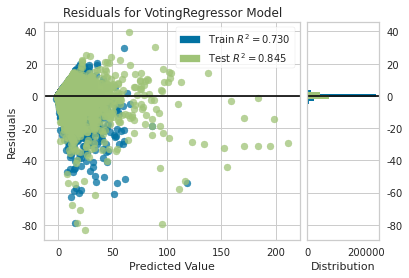

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [63]:
plot_model(final_model, plot = 'residuals')

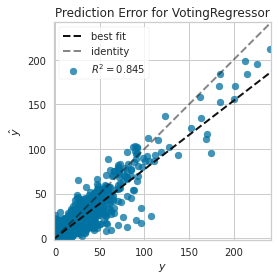

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [64]:
plot_model(final_model, plot = 'error')

In [68]:
evaluate_model(final_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=VotingRegressor(estimators=[('catboost',
                             <catboost.core.CatBoostRegressor object at 0x7fa9116c14d0>),
                            ('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   mi

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

##### catboost

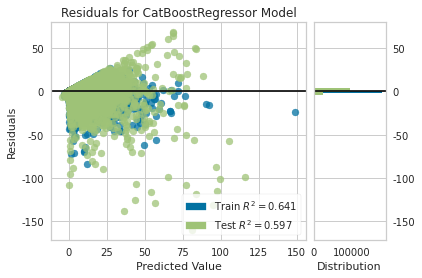

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [66]:
plot_model(catboost, plot = 'residuals')

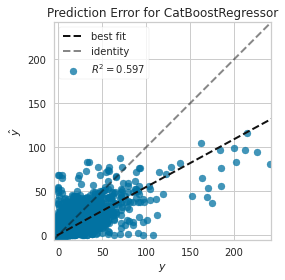

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [67]:
plot_model(catboost, plot = 'error')

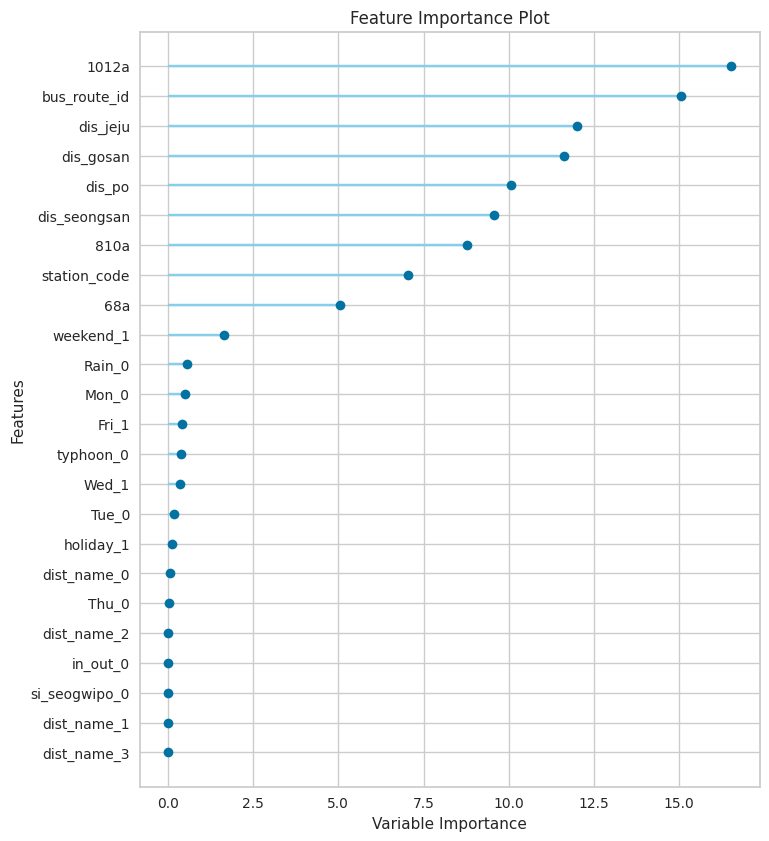

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [69]:
plot_model(catboost, plot = 'feature_all')

##### rf

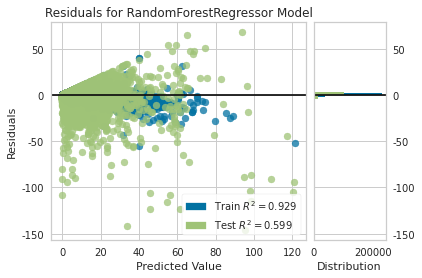

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [70]:
plot_model(rf, plot = 'residuals')

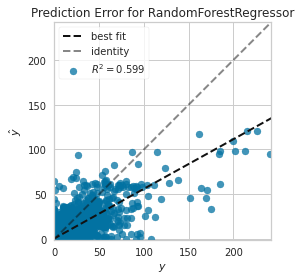

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [71]:
plot_model(rf, plot = 'error')

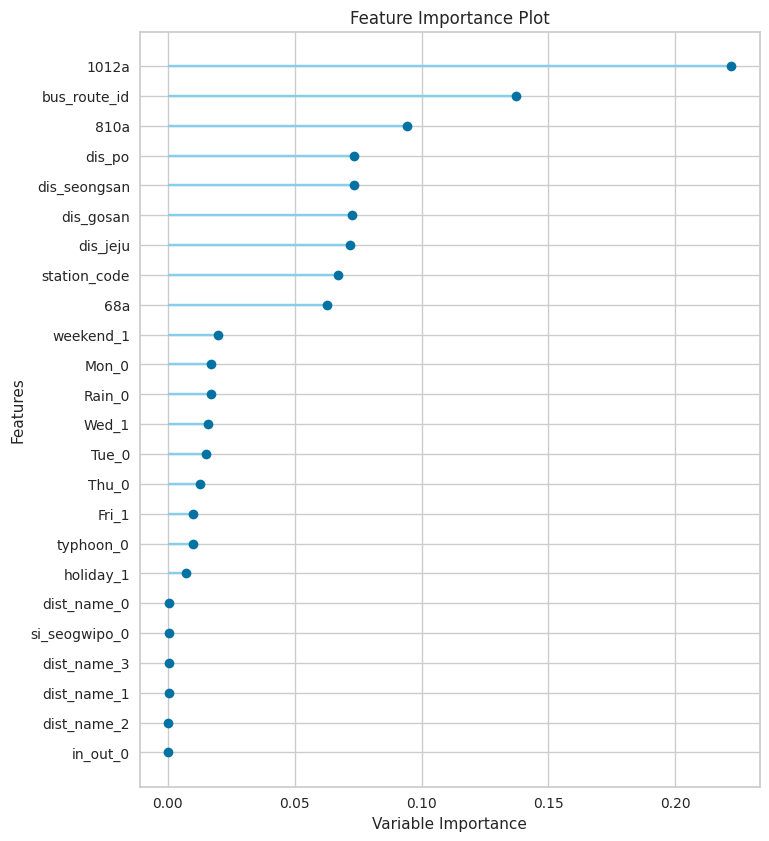

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [72]:
plot_model(rf, plot = 'feature_all')

##### lightgbm

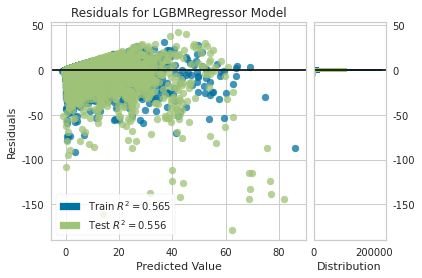

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [73]:
plot_model(lightgbm, plot = 'residuals')

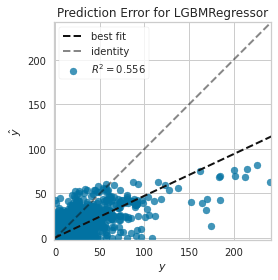

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [74]:
plot_model(lightgbm, plot = 'error')

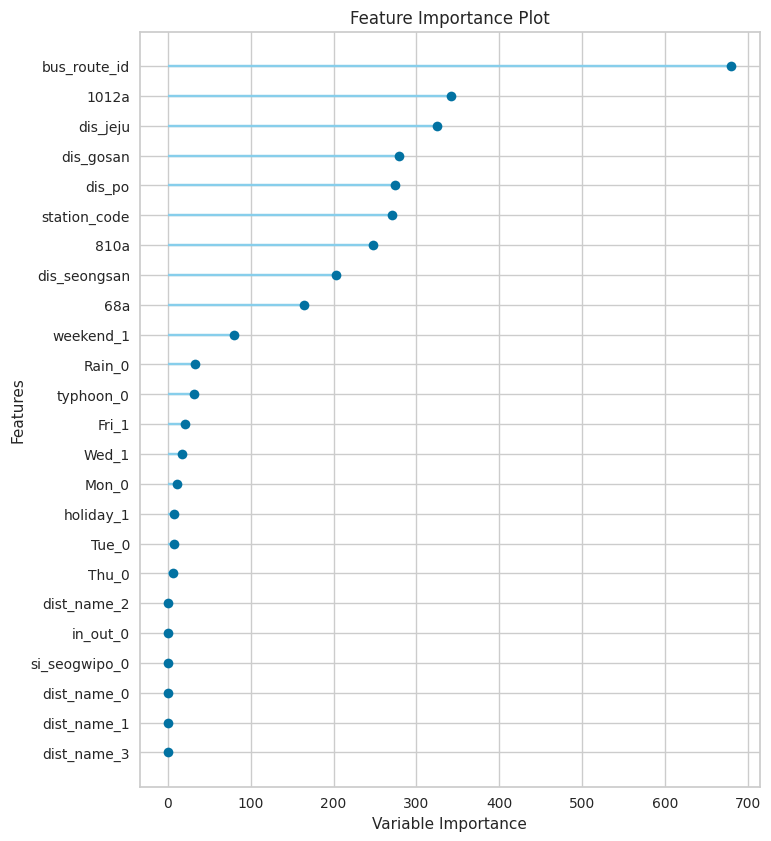

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [75]:
plot_model(lightgbm, plot = 'feature_all')